<a href="https://colab.research.google.com/github/221FA04712/221FA04712/blob/master/hospital_readmission_712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data = pd.read_csv('/content/diabetic_data.csv')

In [ ]:
data.shape

(11105, 50)

In [ ]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
11100,46246122,7739100,Caucasian,Female,[80-90),?,3,18,4,3,...,No,No,No,No,No,No,No,No,Yes,NO
11101,46247088,1209375,Caucasian,Female,[90-100),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
11102,46247442,96246801,Caucasian,Female,[40-50),?,6,1,7,8,...,No,Down,No,No,No,No,No,Ch,Yes,NO
11103,46247802,66595860,Caucasian,Female,[80-90),?,1,1,7,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
11104,46247880,9346356,Caucasian,Female,[60-70),?,1,1,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11105 entries, 0 to 11104
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              11105 non-null  int64 
 1   patient_nbr               11105 non-null  int64 
 2   race                      11105 non-null  object
 3   gender                    11105 non-null  object
 4   age                       11105 non-null  object
 5   weight                    11105 non-null  object
 6   admission_type_id         11105 non-null  int64 
 7   discharge_disposition_id  11105 non-null  int64 
 8   admission_source_id       11105 non-null  int64 
 9   time_in_hospital          11105 non-null  int64 
 10  payer_code                11105 non-null  object
 11  medical_specialty         11105 non-null  object
 12  num_lab_procedures        11105 non-null  int64 
 13  num_procedures            11105 non-null  int64 
 14  num_medications       

In [ ]:
data.nunique()

,0
encounter_id,11105
patient_nbr,9021
race,6
gender,2
age,10
weight,10
admission_type_id,7
discharge_disposition_id,14
admission_source_id,10
time_in_hospital,14


In [ ]:
data.replace('?', np.NaN, inplace=True)

<ipython-input-7-06fb38c90bae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.NaN, inplace=True)


In [ ]:
data.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,197
gender,0
age,0
weight,10787
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data['gender'].value_counts()

,count
gender,
Female,5939
Male,5166


In [ ]:
data = data[data['gender']!='Unknown/Invalid']

In [ ]:
cols_to_drop = ['weight', 'payer_code','medical_specialty','encounter_id','patient_nbr','examide','citoglipton']

In [ ]:
data = data.drop(cols_to_drop, axis=1)

In [ ]:
data.shape

(11105, 43)

In [ ]:
data.dropna(how='any',axis=0,inplace=True)

In [ ]:
data.shape

(31, 43)

In [ ]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,<30
1,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,Yes,NO
4,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,>30
5,Caucasian,Male,[80-90),6,1,7,7,105,3,16,...,No,No,No,No,No,No,No,No,Yes,>30
6,Hispanic,Female,[50-60),6,1,7,2,66,0,3,...,No,No,No,No,No,No,No,No,Yes,<30
7,Caucasian,Female,[40-50),6,1,7,3,76,0,9,...,No,No,No,No,No,No,No,Ch,Yes,>30
8,Caucasian,Female,[50-60),6,1,7,2,43,0,13,...,No,No,No,No,No,No,No,No,No,>30
9,Caucasian,Male,[50-60),6,10,1,4,41,1,8,...,No,No,No,No,No,No,No,No,Yes,>30


In [ ]:
data.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

<ipython-input-19-a4a0d577cf62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['readmitted'] = data['readmitted'].replace('NO', 0)


In [ ]:
data['diabetesMed'].value_counts()

,count
diabetesMed,
Yes,22
No,9


<Axes: xlabel='readmitted'>

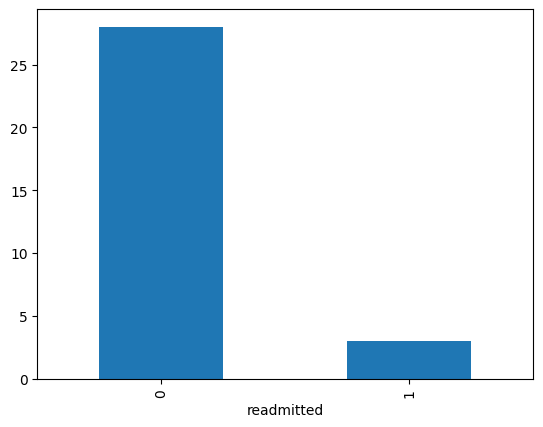

In [ ]:
data['readmitted'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

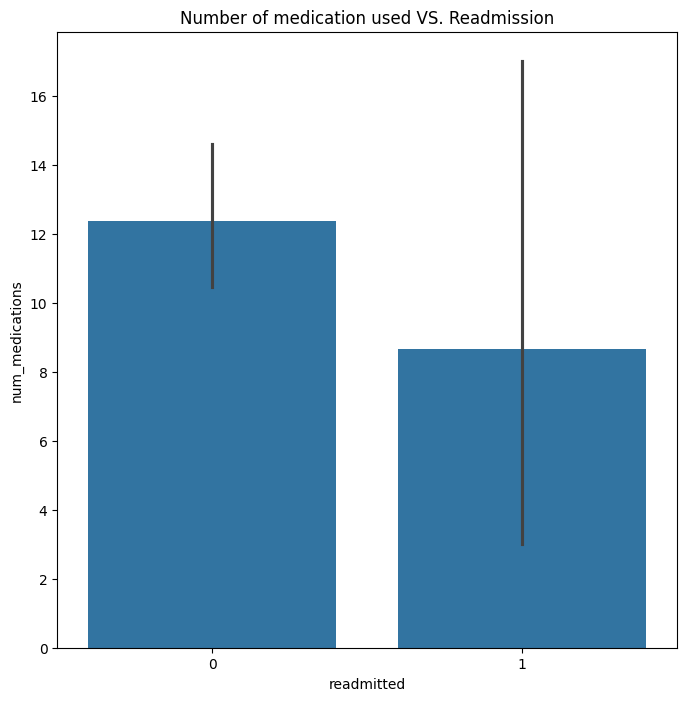

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

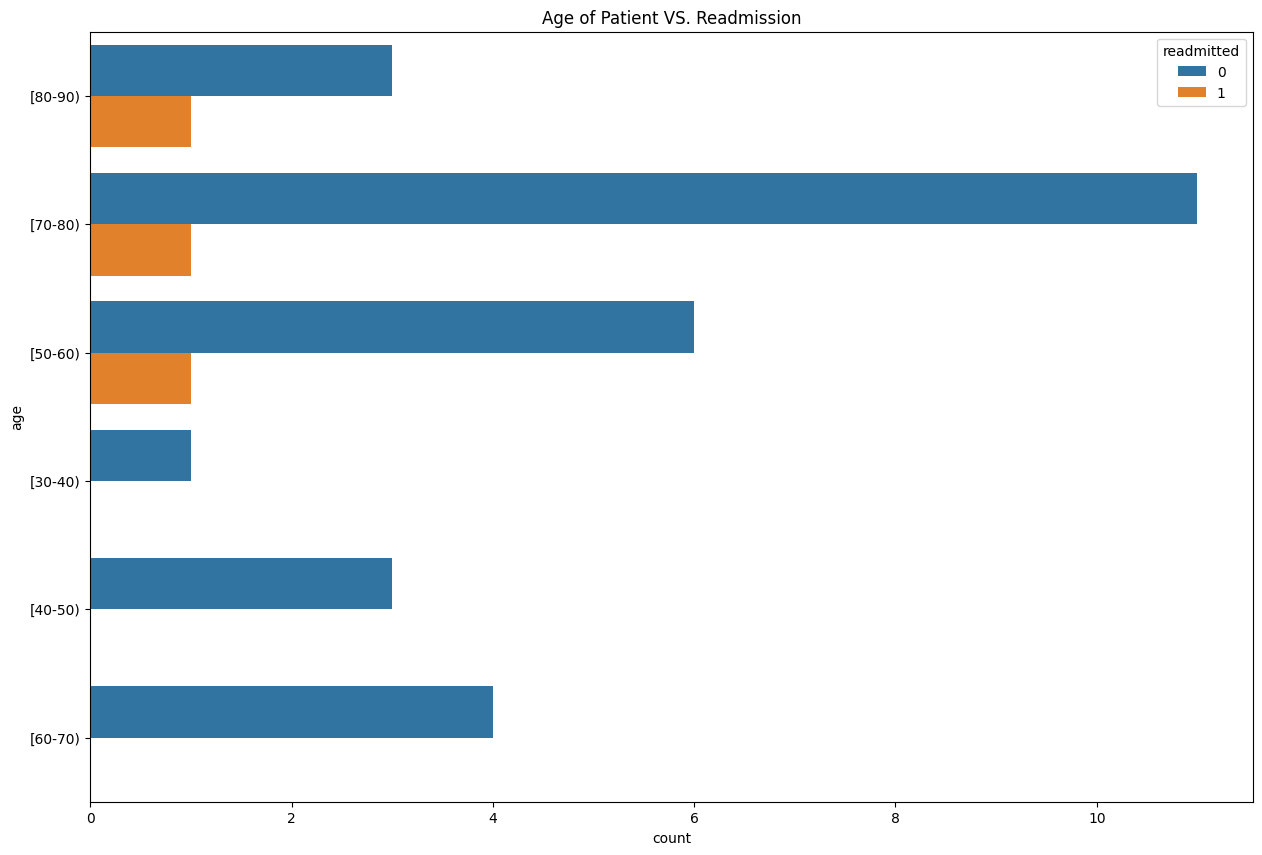

In [ ]:
fig = plt.figure(figsize=(15,10))
sb.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

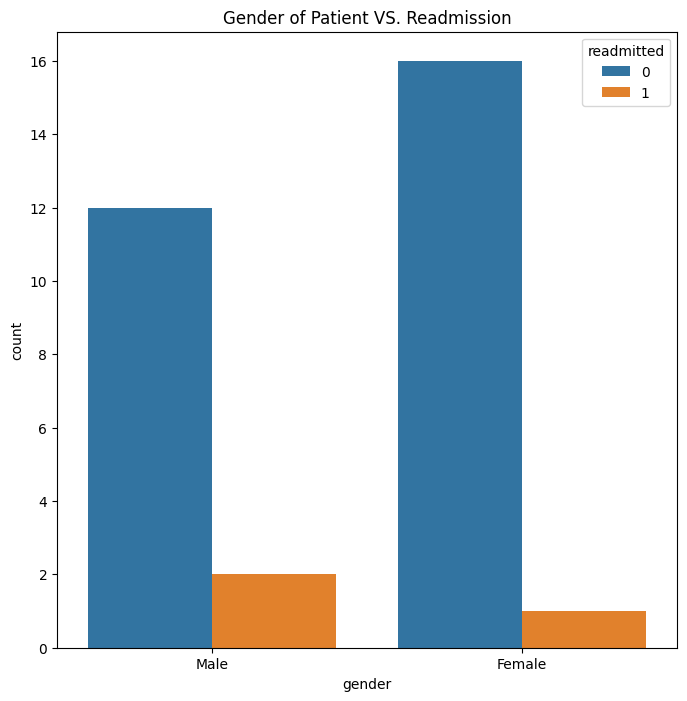

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['gender'], hue = data['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

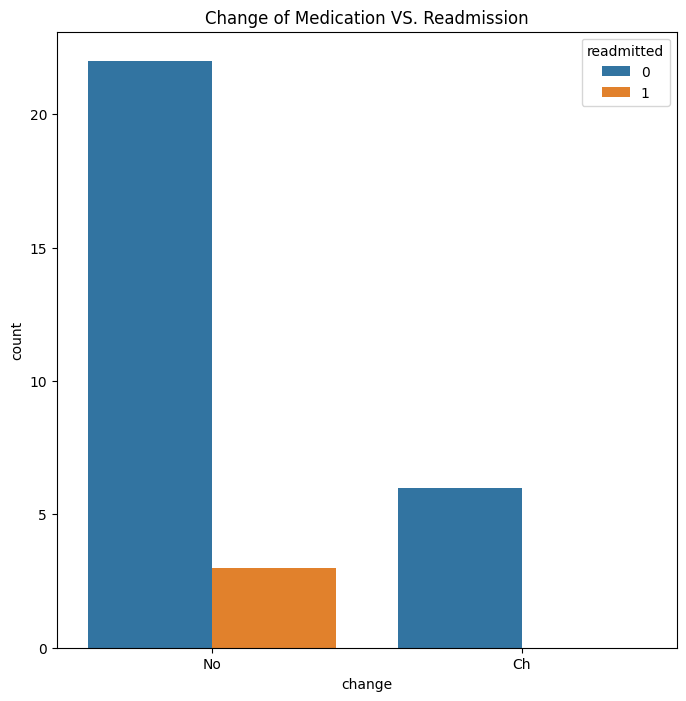

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['change'], hue = data['readmitted']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

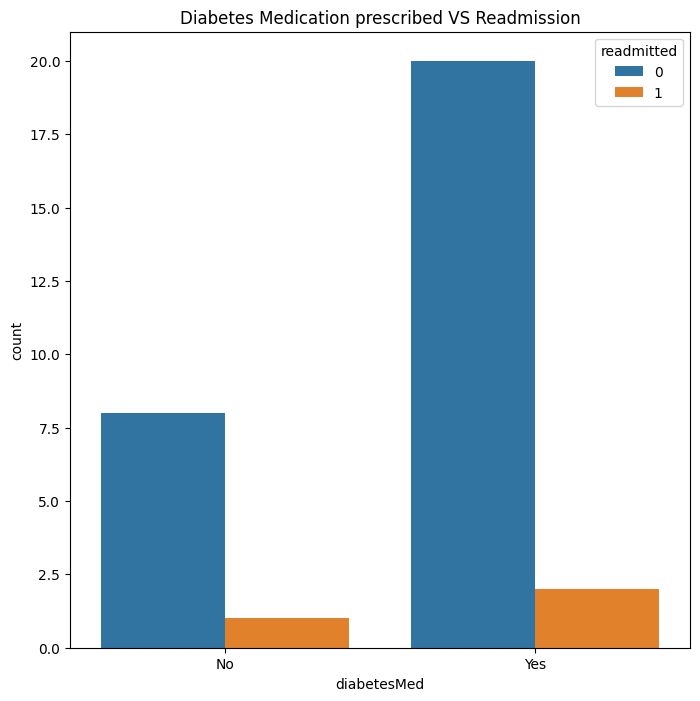

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['diabetesMed'], hue = data['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Glucose serum test result VS. Readmission')

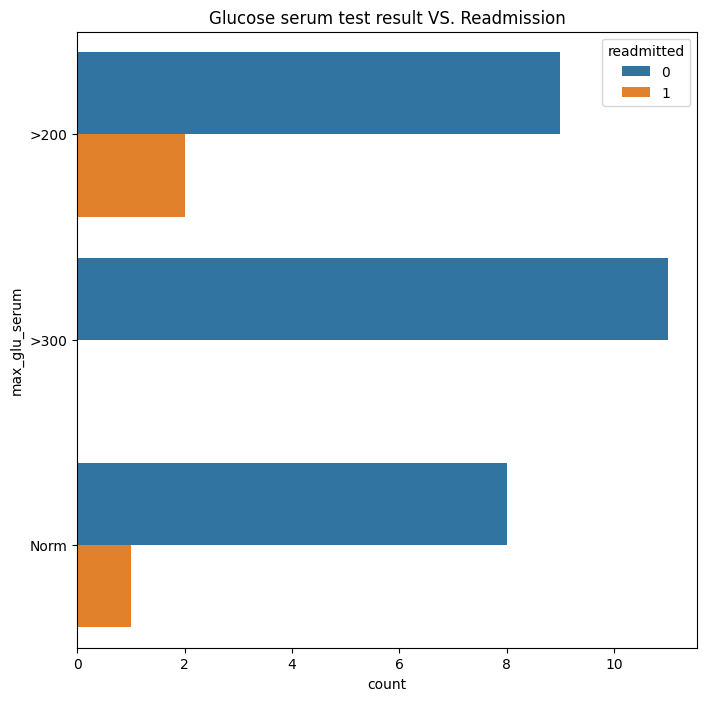

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose serum test result VS. Readmission')

<ipython-input-28-2bc542a8b5d8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-28-2bc542a8b5d8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

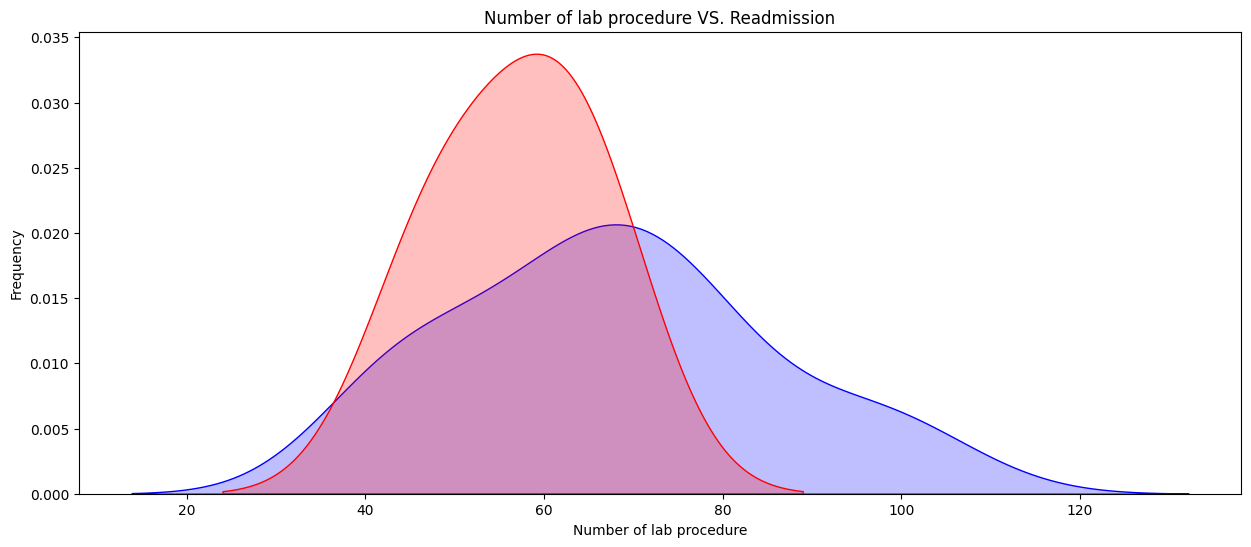

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

<ipython-input-29-1c0c559250fd>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-29-1c0c559250fd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

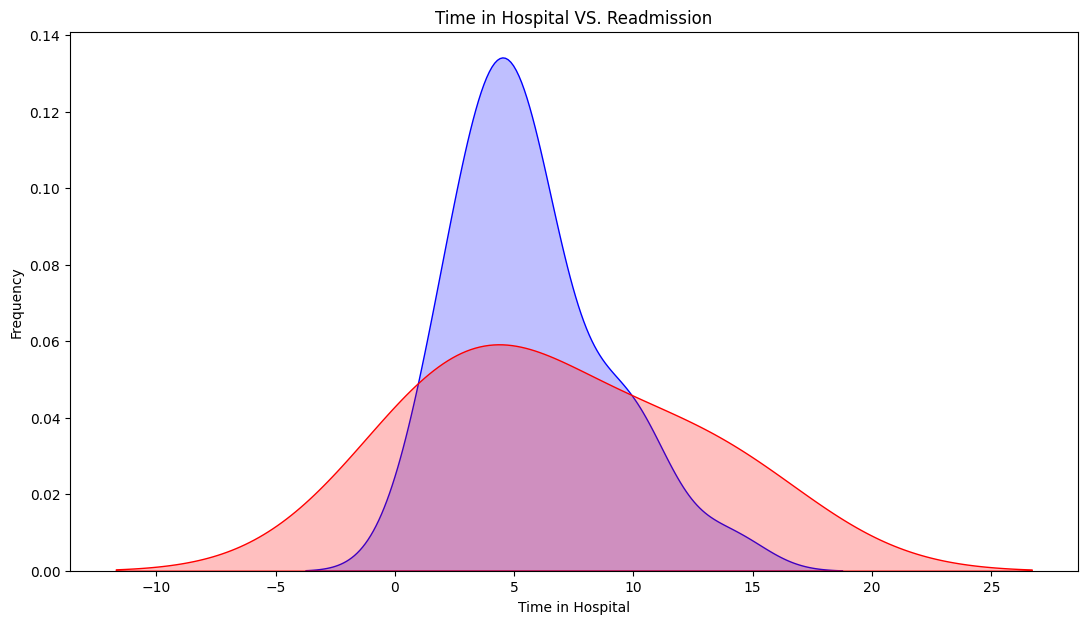

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [ ]:
data.describe(include='all')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,31,31,31,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31,31,31,31,31,31,31,31,31,31.000000
unique,4,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4,1,1,1,1,1,2,2,NaN
top,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,20,17,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31,19,31,31,31,31,31,25,22,NaN
mean,NaN,NaN,NaN,6.0,2.032258,6.645161,5.741935,66.677419,0.741935,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096774
std,NaN,NaN,NaN,0.0,2.008048,1.379575,3.286008,17.201525,1.124507,5.579725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300537
min,NaN,NaN,NaN,6.0,1.000000,1.000000,1.000000,41.000000,0.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,6.0,1.000000,7.000000,4.000000,54.000000,0.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,6.0,1.000000,7.000000,5.000000,66.000000,0.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,6.0,2.500000,7.000000,7.000000,76.500000,1.000000,15.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
data = data.replace({'admission_type_id':{2:1,7:1,6:5,8:5}, 'discharge_disposition_id':{6:1,8:1,9:1,13:1,3:2,4:2,5:2,
                    14:2,22:2,23:2,24:2,12:10,15:10,16:10,17:10,25:18,26:18}, 'admission_source_id':{2:1,3:1,5:4,6:4,
                    10:4,22:4,25:4,15:9,17:9,20:9,21:9,13:11,14:11}})

In [ ]:
drugs = ['metformin', 'repaglinide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
drugs_to_drop =["nateglinide", "chlorpropamide", "acetohexamide", "tolbutamide",
             "acarbose", "miglitol", "troglitazone", "tolazamide", "glyburide-metformin",
                "glipizide-metformin","glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

In [ ]:
for col in drugs:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

<ipython-input-33-b80a4624625a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('Up', 1)
<ipython-input-33-b80a4624625a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No', 0)
<ipython-input-33-b80a4624625a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [ ]:
data.drop(drugs_to_drop, axis=1,inplace=True)

In [ ]:
data['A1Cresult'].value_counts()

,count
A1Cresult,
>8,15
>7,12
Norm,4


In [ ]:
data['max_glu_serum'].value_counts()

,count
max_glu_serum,
>200,11
>300,11
Norm,9


In [ ]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

<ipython-input-37-8d70d3470560>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
<ipython-input-37-8d70d3470560>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)


In [ ]:
data['age'].value_counts()

,count
age,
[70-80),12
[50-60),7
[80-90),4
[60-70),4
[40-50),3
[30-40),1


In [ ]:
for i in range(0,10):
    data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i+10*(i+1))//2)
data['age'].value_counts()

<ipython-input-39-0708be41686c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i+10*(i+1))//2)


,count
age,
75,12
55,7
85,4
65,4
45,3
35,1


In [ ]:
def conv_diag(icd9):
    try:
        n = float(icd9)
        if (n>=390 and n<=459) or (n==785):
            return "circulatory"
        elif (n>=520 and n<=579) or (n==787):
            return "digestive"
        elif (n>=580 and n<=629) or (n==788):
            return "genitourinary"
        elif np.trunc(n)==250:
            return "diabetes"
        elif (n>=800 and n<=999):
            return "injury"
        elif (n>=710 and n<=739):
            return "musculoskeletal"
        elif (n>140 and n<=239):
            return "neoplasms"
        elif (n>=460 and n<=519) or (n==786):
            return "respiratory"
        else :
            return "other"
    except:
        return "other"

In [ ]:
data['diag_1'] = data['diag_1'].apply(conv_diag)
data['diag_2'] = data['diag_2'].apply(conv_diag)
data['diag_3'] = data['diag_3'].apply(conv_diag)

In [ ]:
# diag1_num = le.fit_transform(data['diag_1'])
# diag2_num = le.fit_transform(data['diag_2'])
# diag3_num = le.fit_transform(data['diag_3'])

In [ ]:
# data['diag_1'] = diag1_num
# data['diag_2'] = diag2_num
# data['diag_3'] = diag3_num

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le= LabelEncoder()
# race = le.fit_transform(data['race'])
# data['race'] = race

In [ ]:
data.head().T

,162,460,593,696,771
race,Caucasian,AfricanAmerican,Caucasian,Other,Caucasian
gender,Male,Female,Female,Male,Female
age,85,75,55,75,35
admission_type_id,5,5,5,5,5
discharge_disposition_id,2,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,5,10,2,11,14
num_lab_procedures,47,72,61,71,43
num_procedures,1,1,0,1,0
num_medications,6,19,5,20,11


In [ ]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Male,85,5,2,7,5,47,1,6,...,0,0,0,0,0,0,0,No,No,1
1,AfricanAmerican,Female,75,5,1,7,10,72,1,19,...,0,0,1,0,0,0,1,Ch,Yes,0
2,Caucasian,Female,55,5,1,7,2,61,0,5,...,0,0,0,0,0,0,1,No,Yes,0
3,Other,Male,75,5,1,7,11,71,1,20,...,0,0,0,0,0,0,0,No,Yes,0
4,Caucasian,Female,35,5,1,1,14,43,0,11,...,0,0,0,0,0,0,0,No,No,0
5,Caucasian,Male,85,5,1,7,7,105,3,16,...,0,0,1,0,0,0,0,No,Yes,0
6,Hispanic,Female,55,5,1,7,2,66,0,3,...,0,0,0,0,0,0,0,No,Yes,1
7,Caucasian,Female,45,5,1,7,3,76,0,9,...,0,0,1,0,0,0,0,Ch,Yes,0
8,Caucasian,Female,55,5,1,7,2,43,0,13,...,0,0,0,0,0,0,0,No,No,0
9,Caucasian,Male,55,5,10,1,4,41,1,8,...,0,0,1,0,0,0,0,No,Yes,0


In [ ]:
data.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted
count,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,...,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.0,31.000000,31.000000
mean,66.290323,5.0,1.548387,6.612903,5.741935,66.677419,0.741935,12.000000,0.0,0.0,...,0.870968,0.193548,0.0,0.0,0.161290,0.064516,0.032258,0.0,0.387097,0.096774
std,13.599494,0.0,1.629698,1.498386,3.286008,17.201525,1.124507,5.579725,0.0,0.0,...,0.340777,0.401610,0.0,0.0,0.373878,0.249731,0.179605,0.0,0.495138,0.300537
min,35.000000,5.0,1.000000,1.000000,1.000000,41.000000,0.000000,3.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,55.000000,5.0,1.000000,7.000000,4.000000,54.000000,0.000000,9.000000,0.0,0.0,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,75.000000,5.0,1.000000,7.000000,5.000000,66.000000,0.000000,11.000000,0.0,0.0,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,75.000000,5.0,2.000000,7.000000,7.000000,76.500000,1.000000,15.500000,0.0,0.0,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,85.000000,5.0,10.000000,7.000000,14.000000,105.000000,3.000000,28.000000,0.0,0.0,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [ ]:
X = data.drop('readmitted', axis = 1)
y = data['readmitted']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diag_3','race','change','gender','diabetesMed'])]
                        ,remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)

In [ ]:
X

array([[  6.,   3.,   0.,   1.,   1.,   1.,   0.,  85.,   5.,   2.,   7.,
          5.,  47.,   1.,   6.,   0.,   0.,   0.,   5.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   3.,   6.,   0.,   0.,   0.,   1.,  75.,   5.,   1.,   7.,
         10.,  72.,   1.,  19.,   0.,   0.,   0.,   5.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  6.,   3.,   1.,   1.,   1.,   0.,   1.,  55.,   5.,   1.,   7.,
          2.,  61.,   0.,   5.,   0.,   0.,   0.,   5.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.],
       [  4.,   1.,   6.,   3.,   1.,   1.,   1.,  75.,   5.,   1.,   7.,
         11.,  71.,   1.,  20.,   0.,   0.,   0.,   5.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  6.,   1.,   2.,   1.,   1.,   0.,   0.,  35.,   5.,   1.,   1.,
         14.,  43.,   0.,  11.,   0.,   0.,   0.,   3.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.],
     

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,random_state=20)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 29), (10, 29), (21,), (10,))

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install imbalanced-learn


In [ ]:
sm = SMOTE(random_state = 20)
X1_res, y1_res = sm.fit_resample(X_train,y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2

In [ ]:
X1_res = np.array(X1_res)

In [ ]:
y1_res = np.array(y1_res)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res,test_size=0.3, random_state=20)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((249, 29), (107, 29), (249,), (107,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [ ]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=20)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=20)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=20)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=20)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=20)


In [ ]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))

    print()

In [ ]:
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

======================================Logistic regression=======================================
Score is : 0.7663551401869159

======================================KNN Classifier=======================================
Score is : 0.794392523364486

======================================Decision Tree Classifier=======================================
Score is : 0.8317757009345794

======================================Random Forest Classifier=======================================
Score is : 0.9345794392523364



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


======================================AdaBoost Classifier=======================================
Score is : 0.9439252336448598

======================================Gradient Boosting Classifier=======================================
Score is : 0.9532710280373832



In [ ]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'=',accuracy_score(y_test,p))

Testing accuracy of  Logistic regression = 0.735632183908046
Testing accuracy of  KNN Classifier = 0.632183908045977
Testing accuracy of  Decision Tree Classifier = 0.7241379310344828
Testing accuracy of  Random Forest Classifier = 0.8620689655172413
Testing accuracy of  AdaBoost Classifier = 0.8160919540229885
Testing accuracy of  Gradient Boosting Classifier = 0.8620689655172413


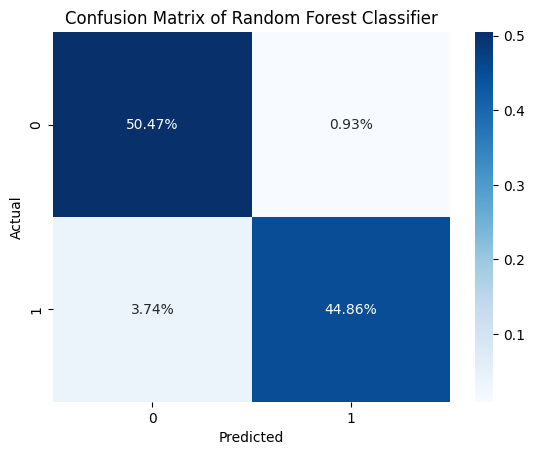

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


pred_rfc = rfc.predict(X_val)


cf_matrix = confusion_matrix(y_val, pred_rfc)


sb.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.show()


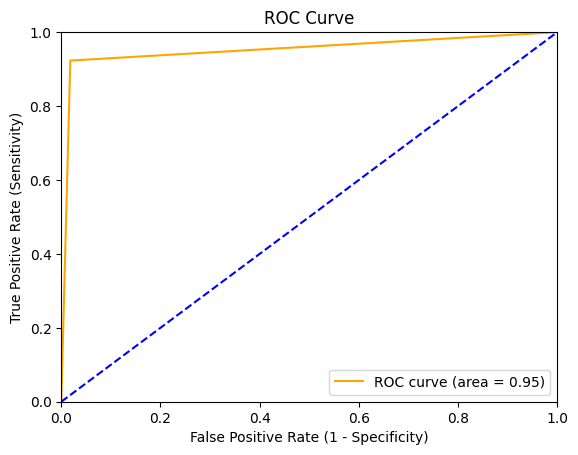

(array([0.        , 0.01818182, 1.        ]),
 array([0.        , 0.92307692, 1.        ]),
 array([inf,  1.,  0.]))

In [ ]:
#Plotting ROC curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_val, pred_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_val, pred_rfc)

In [ ]:
print(classification_report(y_val,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.98      0.92      0.95        52

    accuracy                           0.95       107
   macro avg       0.96      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107



In [ ]:
#Fitting data to Random Forest classifier
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_val)
print('Training Accuracy of Random Forest=',accuracy_score(y_val,pred_rfc))

Training Accuracy of Random Forest= 0.9345794392523364


In [ ]:
cols = list(data.columns)
cols.remove('readmitted')

Feature: 0, Score: 0.02790
Feature: 1, Score: 0.04443
Feature: 2, Score: 0.08359
Feature: 3, Score: 0.04315
Feature: 4, Score: 0.02053
Feature: 5, Score: 0.04927
Feature: 6, Score: 0.03369
Feature: 7, Score: 0.04361
Feature: 8, Score: 0.02092
Feature: 9, Score: 0.11388
Feature: 10, Score: 0.01316
Feature: 11, Score: 0.06027
Feature: 12, Score: 0.04916
Feature: 13, Score: 0.03525
Feature: 14, Score: 0.04268
Feature: 15, Score: 0.00788
Feature: 16, Score: 0.00737
Feature: 17, Score: 0.14245
Feature: 18, Score: 0.02519
Feature: 19, Score: 0.01714
Feature: 20, Score: 0.03282
Feature: 21, Score: 0.01173
Feature: 22, Score: 0.00360
Feature: 23, Score: 0.00157
Feature: 24, Score: 0.00954
Feature: 25, Score: 0.01880
Feature: 26, Score: 0.00612
Feature: 27, Score: 0.00985
Feature: 28, Score: 0.02447
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 

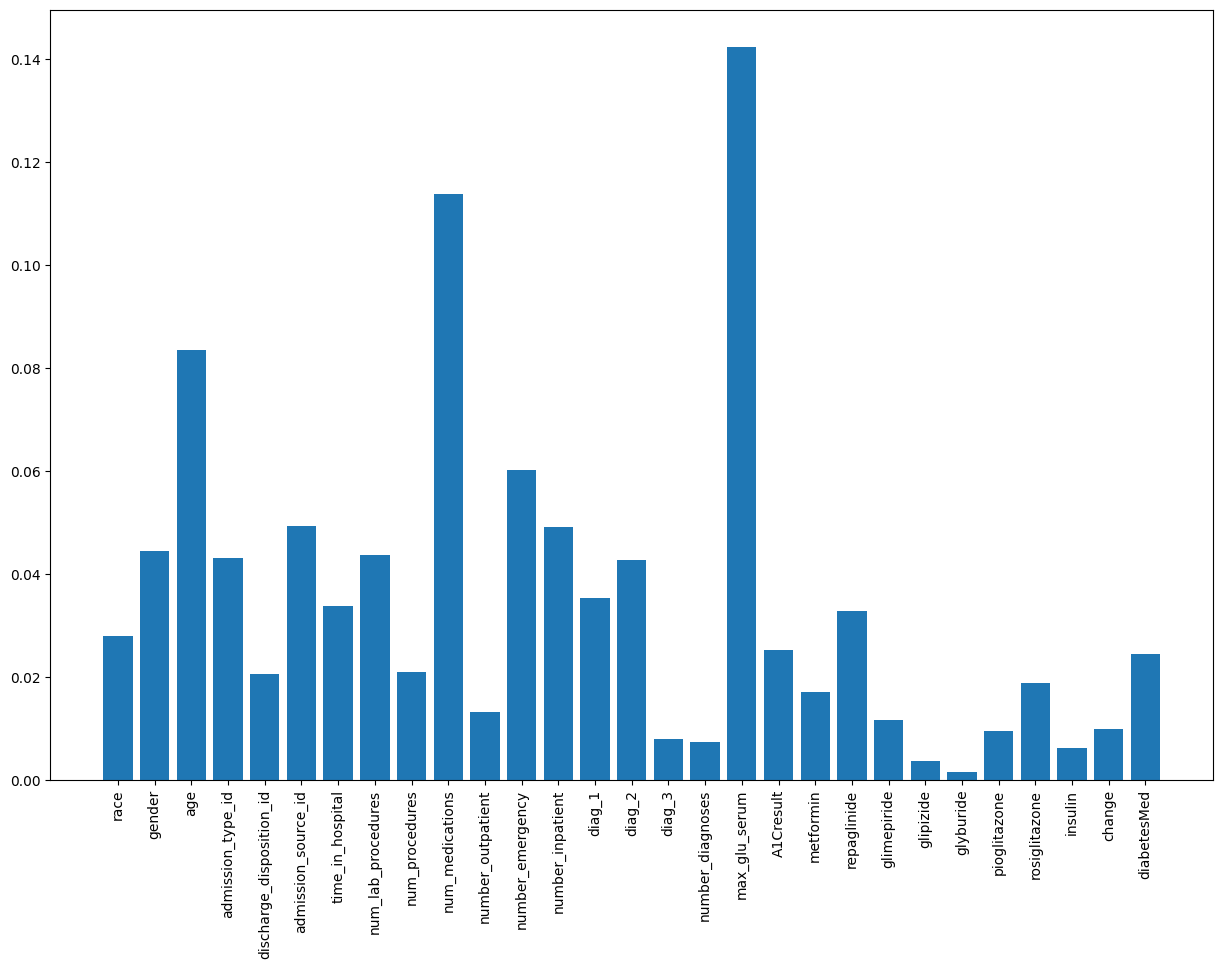

In [ ]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
print(cols)
plt.figure(figsize=(15,10))
plt.bar([cols[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
p = rfc.predict(X_test)
print('Testing Accuracy of Random Forest: ',accuracy_score(y_test,p))

Testing Accuracy of Random Forest:  0.8620689655172413


In [ ]:
rfc.predict = [[  8.,   1.,   1.,   1.,   7.,   4.,  24.,   0.,   4.,   1.,   0.]]




In [ ]:
imp_cols = []
for i,v in enumerate(importance):
    if (v>0.035):
        imp_cols.append(cols[i])

In [ ]:
imp_cols

['gender',
 'age',
 'admission_type_id',
 'admission_source_id',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'max_glu_serum']

In [ ]:
final_data = data[imp_cols+['readmitted']].copy()

In [ ]:
final_data.shape

(289, 12)

In [ ]:
X1 = final_data.drop('readmitted', axis = 1)
y1 = final_data['readmitted']

In [ ]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diabetesMed'])]
                        ,remainder='passthrough')

In [ ]:
X1.shape, y1.shape

((289, 11), (289,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    stratify=y1,
                                                    test_size=0.3, random_state=20)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 11), (87, 11), (202,), (87,))

In [ ]:
X_test[20:40]

,gender,age,admission_type_id,admission_source_id,num_lab_procedures,num_medications,number_emergency,number_inpatient,diag_1,diag_2,max_glu_serum
1983,Male,55,5,1,41,8,0,0,musculoskeletal,respiratory,1
6952,Female,85,5,7,68,10,0,0,circulatory,circulatory,0
1755,Female,55,5,7,43,13,0,0,other,diabetes,1
88478,Male,55,1,7,58,11,0,0,diabetes,respiratory,1
76953,Female,75,1,7,54,19,0,2,neoplasms,respiratory,1
31766,Female,55,5,7,84,19,0,0,circulatory,other,1
5387,Male,85,5,7,74,11,0,0,digestive,genitourinary,1
32699,Female,45,5,7,58,19,0,1,respiratory,diabetes,1
5148,Male,45,5,7,95,17,0,0,respiratory,diabetes,1
9118,Male,45,5,7,78,13,0,0,diabetes,respiratory,1


In [ ]:
y_test[20:40]

,readmitted
1983,0
6952,0
1755,0
88478,0
76953,0
31766,0
5387,0
32699,0
5148,0
9118,0


In [ ]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

In [ ]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [ ]:
new = joblib.load('feature_values')